In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [5]:
data = pd.read_csv('mut_spectr/unity_all.tsv', sep='\t')

In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
data.set_index('Virus_Name', inplace=True)

In [8]:
normed_data = data / data.to_numpy().sum(axis=1).reshape(9,1)

In [9]:
normed_data

,"('C', 'A')","('T', 'A')","('C', 'T')","('G', 'C')","('A', 'C')","('G', 'T')","('T', 'G')","('T', 'C')","('G', 'A')","('A', 'G')","('A', 'T')","('C', 'G')"
Virus_Name,,,,,,,,,,,,
coronavirus,0.021383,0.012111,0.450563,0.014571,0.016463,0.206642,0.012206,0.089034,0.069732,0.080424,0.022235,0.004636
west_nile_virus,0.014762,0.014340,0.394118,0.003451,0.009892,0.018289,0.008704,0.238258,0.133545,0.148422,0.012998,0.003221
mumps,0.060844,0.028459,0.198234,0.001963,0.028459,0.073602,0.025515,0.195289,0.167812,0.188420,0.023553,0.007851
zika,0.017857,0.023048,0.274917,0.008929,0.016819,0.016819,0.010174,0.283430,0.137043,0.185216,0.020972,0.004776
west_african_ebola,0.019377,0.024316,0.177432,0.006839,0.040274,0.013678,0.033815,0.246960,0.158055,0.249240,0.025456,0.004559
dengue,0.020091,0.023129,0.284767,0.011858,0.019699,0.014701,0.010552,0.256346,0.156022,0.169351,0.024860,0.008624
avian_influenza,0.036916,0.020913,0.203401,0.005910,0.031006,0.027641,0.020185,0.162757,0.246136,0.216221,0.025095,0.003819
measles,0.036301,0.012100,0.231201,0.007058,0.025353,0.021896,0.012388,0.236099,0.196629,0.198070,0.014549,0.008355
tuberculosis,0.060058,0.009844,0.244796,0.060723,0.040253,0.060907,0.038776,0.083356,0.245497,0.082130,0.010929,0.062731


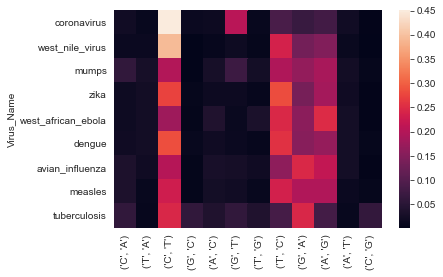

In [10]:
sns.heatmap(normed_data)

In [11]:
import scipy.stats as stats

In [12]:
virus_correlation = stats.spearmanr(normed_data, axis=1).correlation

In [13]:
virus_correlation= pd.DataFrame(virus_correlation)

In [14]:
virus_correlation

,0,1,2,3,4,5,6,7,8
0,1.000000,0.867133,0.816113,0.686516,0.573427,0.720280,0.755245,0.804196,0.601399
1,0.867133,1.000000,0.966727,0.917690,0.734266,0.895105,0.874126,0.902098,0.594406
2,0.816113,0.966727,1.000000,0.854386,0.760071,0.812611,0.879161,0.931700,0.640982
3,0.686516,0.917690,0.854386,1.000000,0.823119,0.977234,0.816113,0.844134,0.437829
4,0.573427,0.734266,0.760071,0.823119,1.000000,0.804196,0.797203,0.832168,0.419580
5,0.720280,0.895105,0.812611,0.977234,0.804196,1.000000,0.825175,0.832168,0.461538
6,0.755245,0.874126,0.879161,0.816113,0.797203,0.825175,1.000000,0.916084,0.622378
7,0.804196,0.902098,0.931700,0.844134,0.832168,0.832168,0.916084,1.000000,0.622378
8,0.601399,0.594406,0.640982,0.437829,0.419580,0.461538,0.622378,0.622378,1.000000


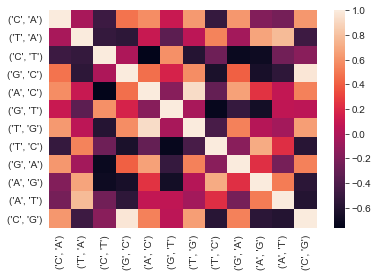

In [15]:
sns.heatmap(normed_data.corr())

In [17]:
!pip3 install -U scikit-learn statsmodels

Requirement already up-to-date: scikit-learn in ./venv/lib/python3.7/site-packages (0.23.2)
     |████████████████████████████████| 9.6MB 1.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from statsmodels.multivariate.pca import PCA

In [19]:
pca = PCA(virus_correlation, ncomp=2)

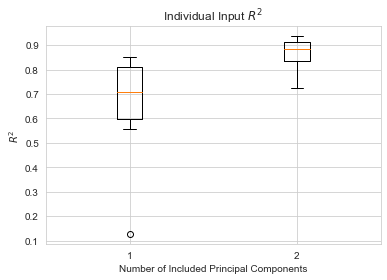

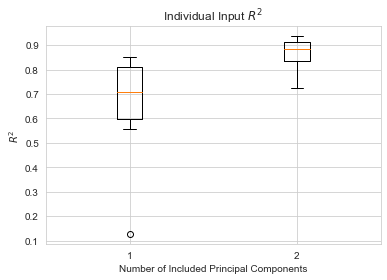

In [22]:
pca.plot_rsquare()

In [23]:
pca.scores

,comp_0,comp_1
0,0.156259,0.425527
1,-0.228976,0.283768
2,-0.185443,0.296844
3,-0.177567,-0.311806
4,0.038581,-0.659421
5,-0.141802,-0.294013
6,-0.137306,0.069477
7,-0.204149,0.161810
8,0.880402,0.027814


In [25]:
pca.factors

,comp_0,comp_1
0,0.156259,0.425527
1,-0.228976,0.283768
2,-0.185443,0.296844
3,-0.177567,-0.311806
4,0.038581,-0.659421
5,-0.141802,-0.294013
6,-0.137306,0.069477
7,-0.204149,0.161810
8,0.880402,0.027814
